In [1]:
import keras
mnist = keras.datasets.mnist
###Cargue divison
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()


Label: 3
Image:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  12  99  91 142 155 246 182 155 155 155 155 131  52   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 138 254 254 254 254 254 254 254 254 254 254 254 252 210 122  33   0   0   0   0   0   0   0   0   0]
 [  0   0   0 220 254 254 254 235 189 189 189 189 150 189 205 254 254 254  75   0   0   0   0   0   0   0   0   0]
 [  0   0   0  35  74  35  35  25   0   0   0   0   0   0  13 2

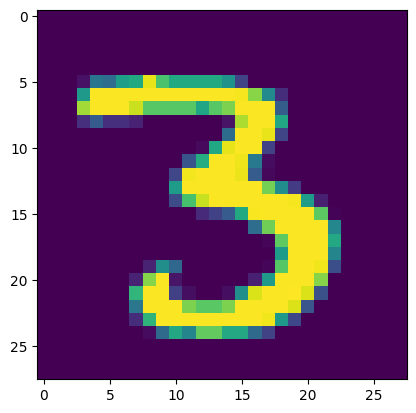

In [5]:
import numpy as np
import matplotlib.pyplot as plt
index =12
np.set_printoptions(linewidth=320)
print(f'Label: {training_labels[index]}')
print(f'Image:\n {training_images[index]}')
#Visualiza
plt.imshow(training_images[index])




In [6]:
#Normalizar los valores
training_images = training_images /255.0
test_images =test_images/255.0


In [8]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                                 keras.layers.Dense(128, activation='relu'),
                                 keras.layers.Dense(10, activation='softmax')])

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
##Entrenar el modelo
history =model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 933us/step - accuracy: 0.8813 - loss: 0.4273
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 902us/step - accuracy: 0.9642 - loss: 0.1224
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 948us/step - accuracy: 0.9769 - loss: 0.0773
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9824 - loss: 0.0576
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9866 - loss: 0.0437
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9898 - loss: 0.0334
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 902us/step - accuracy: 0.9919 - loss: 0.0271
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 907us/step - accuracy: 0.9932 - loss: 0.0213
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9952 - loss: 0.0166
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9964 - loss: 0.0132


<Axes: >

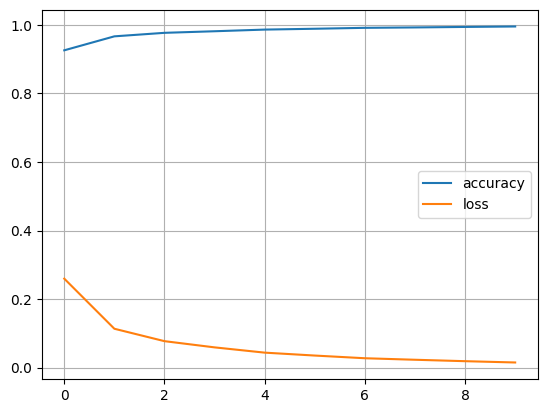

In [16]:
import pandas as pd
pd.DataFrame(history.history).plot(grid=True)

In [17]:
##Evaluar el modelo de conjunto de entrenamiento
loss,accuracy = model.evaluate(training_images,training_labels)
print("Perdida en el conjunto de entrenamiento:", loss)
print("Precisión en ele conjunto de entrenamiento:",accuracy)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - accuracy: 0.9972 - loss: 0.0106
Perdida en el conjunto de entrenamiento: 0.010263843461871147
Precisión en ele conjunto de entrenamiento: 0.9971666932106018


In [18]:
##Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images,test_labels)
print("Perdidad en el conjunto de prueba:",loss)
print("Perdidad en el conjunto de prueba:",accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.9756 - loss: 0.0958
Perdidad en el conjunto de prueba: 0.07866596430540085
Perdidad en el conjunto de prueba: 0.9793000221252441


In [20]:
#Evaluar el modelo de datos no vistos
loss, accuracy =model.evaluate(test_images, test_labels)
print("Perdida en el conjunto de prueba:",loss)
print("Precisión en el conjunto de prueba:", accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.9756 - loss: 0.0958
Perdida en el conjunto de prueba: 0.07866596430540085
Precisión en el conjunto de prueba: 0.9793000221252441
